In [1]:
import pandas as pd
import numpy as np
import pymongo
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import svm 

%matplotlib inline

In [203]:
mongo_url = 'mongodb+srv://hughkohl:' + '*Tiger13' + '@cluster0-bdg3q.azure.mongodb.net/test?retryWrites=true&w=majority'

cluster = pymongo.MongoClient(mongo_url)
db = cluster["job_scrape"]
collection = db["jobs"]

In [204]:
mongo_docs = collection.find()
df = pd.DataFrame(list(mongo_docs))

In [205]:
# drop nonessentials
df.drop(['date', '_id', 'url'], axis=1, inplace=True)

In [206]:
df = df.loc[df.duplicated()==False]

In [207]:
# clean job role column to replace + with _  and description column to lowercase
df['job'] = df['job'].str.replace('+', '_', True)

In [208]:
special_skills = ['R ', 'Excel']

In [209]:
for skill in special_skills:
    df[skill] = 0

In [210]:

for i in range((df.shape[0])):
    for skill in special_skills:
        try:
            if skill in df['description'][i]:
                df[skill][i] += 1
        except:
            pass

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [211]:
df.head()

,job,role,company,description,R,Excel
0,solutions_engineer,Solutions Engineer,Pinterest,Millions of people across the world come to Pi...,0,0
2,solutions_engineer,Data Engineer (NCMEC),Thorn,Thorn is a non-profit focused on building tech...,0,0
4,solutions_engineer,Application Design Engineer,Devotion Business Solutions,Job Description JOB DESCRIPTION Our Client is ...,0,0
5,solutions_engineer,Manufacturing Engineer,Lithos Energy,Who are we?\nLithos Energy designs and builds ...,0,0
6,solutions_engineer,DevOps engineer,MoData,MAIN REQUIREMENTS:\nExperience in deploying an...,1,1


In [212]:
df['description'] = df['description'].str.lower()
df = df.reset_index()

In [213]:
df.drop('index', axis=1, inplace=True)

In [214]:
df.groupby('job').count()

,role,company,description,R,Excel
job,,,,,
account_executive,78,78,78,78,78
business_analyst,98,98,98,98,98
consultant,261,261,261,261,261
customer_success,376,376,376,376,376
data_analyst,79,79,79,79,79
data_engineer,320,320,320,320,320
data_scientist,76,76,76,76,76
developer,204,204,204,204,204
human_resources,95,95,95,95,95


In [148]:
df_ae = df.query('job == "account_executive"')
df_ba  = df.query('job == "business_analyst"')
df_c  = df.query('job == "constultant"')
df_cs  = df.query('job == "customer_success"').iloc[:120]
df_da  = df.query('job == "data_analyst"')
df_de  = df.query('job == "data_engineer"').iloc[:120]
df_ds  = df.query('job == "data_scientist"')
df_dev  = df.query('job == "developer"')
df_hr  = df.query('job == "human_resources"')
df_pm  = df.query('job == "product_manager"')
df_pjm  = df.query('job == "project_manager"')
df_se  = df.query('job == "software_engineer"').iloc[:120]
df_sa  = df.query('job == "solutions_architect"')
df_sole  = df.query('job == "solutions_engineer"').iloc[:120]

In [149]:
df_ae = df_ae.append(df_ba)
df_ae =  df_ae.append(df_c)
df_ae = df_ae.append(df_cs)
df_ae = df_ae.append(df_da)
df_ae = df_ae.append(df_de)
df_ae = df_ae.append(df_ds)
df_ae = df_ae.append(df_dev)
df_ae = df_ae.append(df_hr)
df_ae = df_ae.append(df_pm)
df_ae = df_ae.append(df_pjm)
df_ae = df_ae.append(df_se)
df_ae = df_ae.append(df_sa)
df_ae = df_ae.append(df_sole)

In [150]:
df = df_ae
df = df.reset_index()

In [151]:
df.drop('index', axis=1, inplace=True)

In [215]:
tech_skills= [ 'sql','nosql', 'python', 'airflow', 'terminal', 'java ', 'scala ', 'perl', 'kafka', 'gitlab','git',
     'jenkins', 'javascript', 'julia', 'node','docker', 'kubernetes', 'rancher', 'spring', 'typescript', 'computer science',
     'information systems', 'computer engineering', 'tensorflow',  'keras', 'scikit-learn', 'sklearn', 'theano',
     'caffe', 'pytorch', 'tableau', 'hadoop', 'spark','hive','hbase','react', 'vue', 'ruby', 'angular', 'c++', 'matlab',
     'php', 'html','css','graphql', 'aws', 'google cloud','azure','ibm','salesforce','c#','mongo', 'couch','object oriented programming',
     'sps','sas','powerpoint','tableau', 'looker', 'cognos', 'domo', 'datadog', 'qlik','bigquery','redshift',
     'power bi', 'postgres','php','ci/cd','jenkins','dags','unix','linux','spss','xml', 'fortran', 'cobol']

In [216]:
# ONLY RUN ONCE
for skill in tech_skills:
    df[skill] = 0

In [217]:
#  tech skills +1 if exists in description
for i in range((df.shape[0])):
    for skill in tech_skills:
        try:
            if skill in df['description'][i]:
                df[skill][i] += 1
        except:
            pass

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [218]:
df.head()

,job,role,company,description,R,Excel,sql,nosql,python,airflow,...,power bi,postgres,ci/cd,dags,unix,linux,spss,xml,fortran,cobol
0,solutions_engineer,Solutions Engineer,Pinterest,millions of people across the world come to pi...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,solutions_engineer,Data Engineer (NCMEC),Thorn,thorn is a non-profit focused on building tech...,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,solutions_engineer,Application Design Engineer,Devotion Business Solutions,job description job description our client is ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,solutions_engineer,Manufacturing Engineer,Lithos Energy,who are we?\nlithos energy designs and builds ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,solutions_engineer,DevOps engineer,MoData,main requirements:\nexperience in deploying an...,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [156]:
df_2 = df.groupby('job').sum()

In [219]:
df_perc = (df.groupby('job').sum()/df.groupby('job').count())*100

                  index  business_analyst
0                   sql         29.591837
1               tableau         28.571429
2                   aws         18.367347
3                   git         14.285714
4   information systems         13.265306
5      computer science         12.244898
6                python         12.244898
7            salesforce         12.244898
8            powerpoint         11.224490
9                 Excel         11.224490
10                  sas          9.183673
11               looker          7.142857
12                react          3.061224
13             power bi          3.061224
14                   R           3.061224


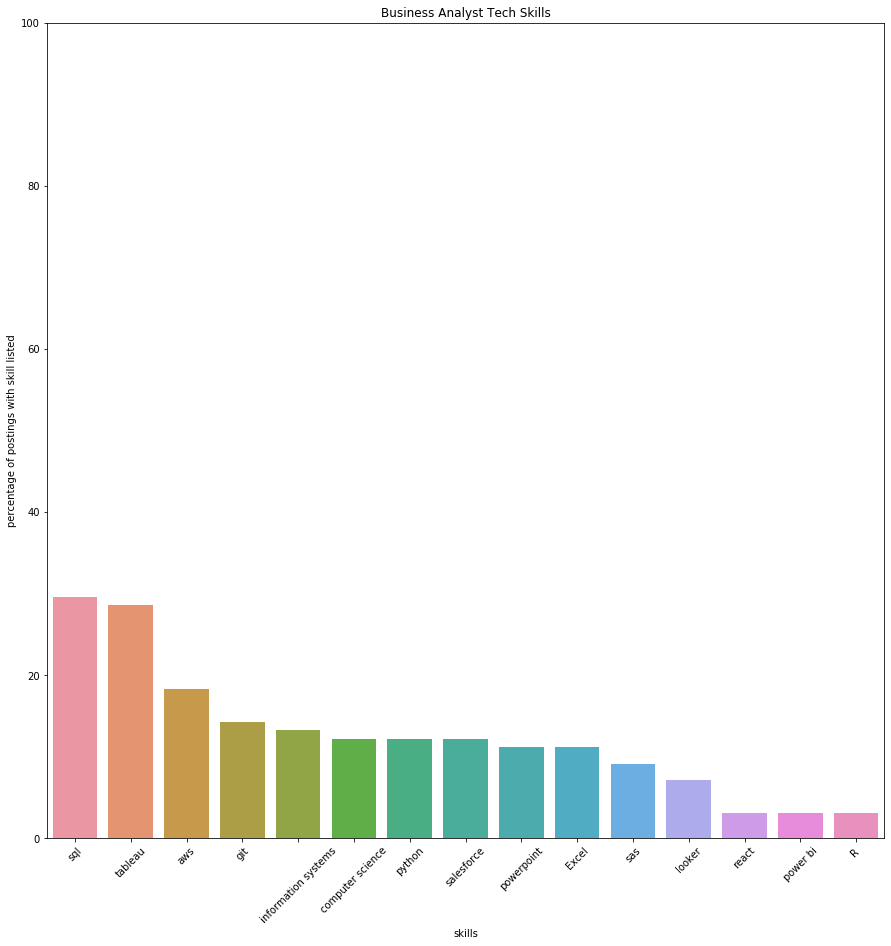

In [220]:
df_ba = df_perc.loc['business_analyst'].sort_values(ascending=False).head(15)
df_ba = df_ba.reset_index()

print(df_ba)
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=45);
sns.barplot(x='index', y='business_analyst', ax=ax, data=df_ba);
plt.title('Business Analyst Tech Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

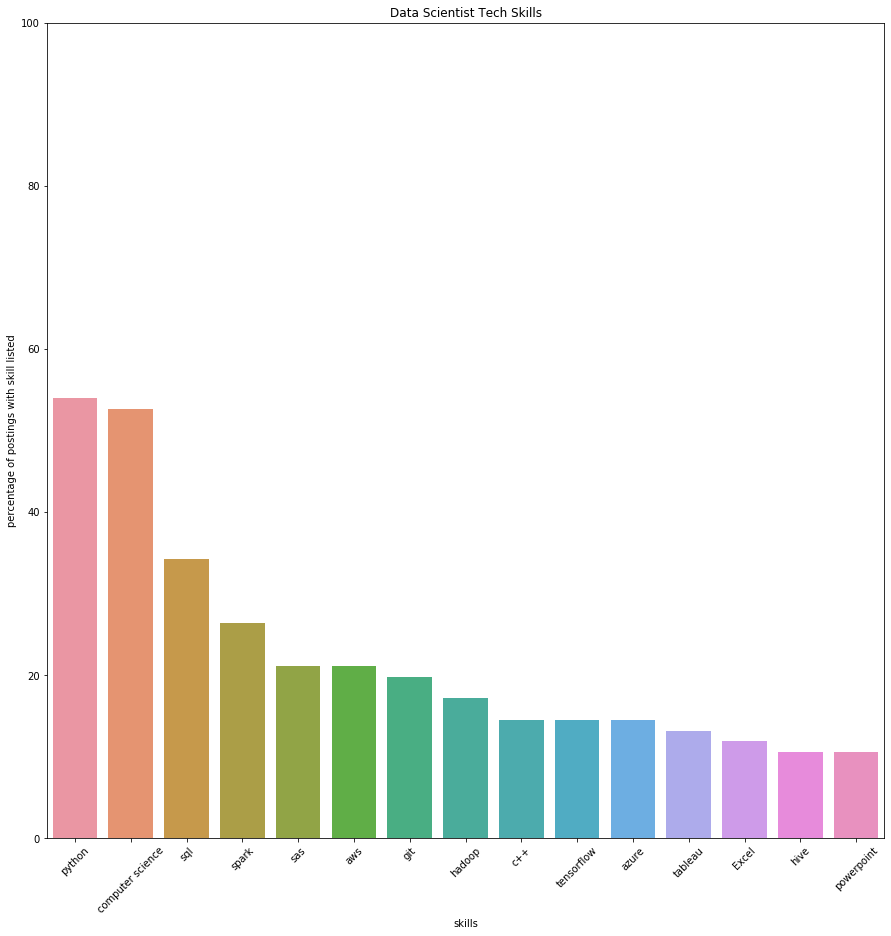

In [221]:
df_ds = df_perc.loc['data_scientist'].sort_values(ascending=False).head(15)
df_ds = df_ds.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='data_scientist', ax=ax, data=df_ds)
plt.xticks(rotation=45);
plt.title('Data Scientist Tech Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

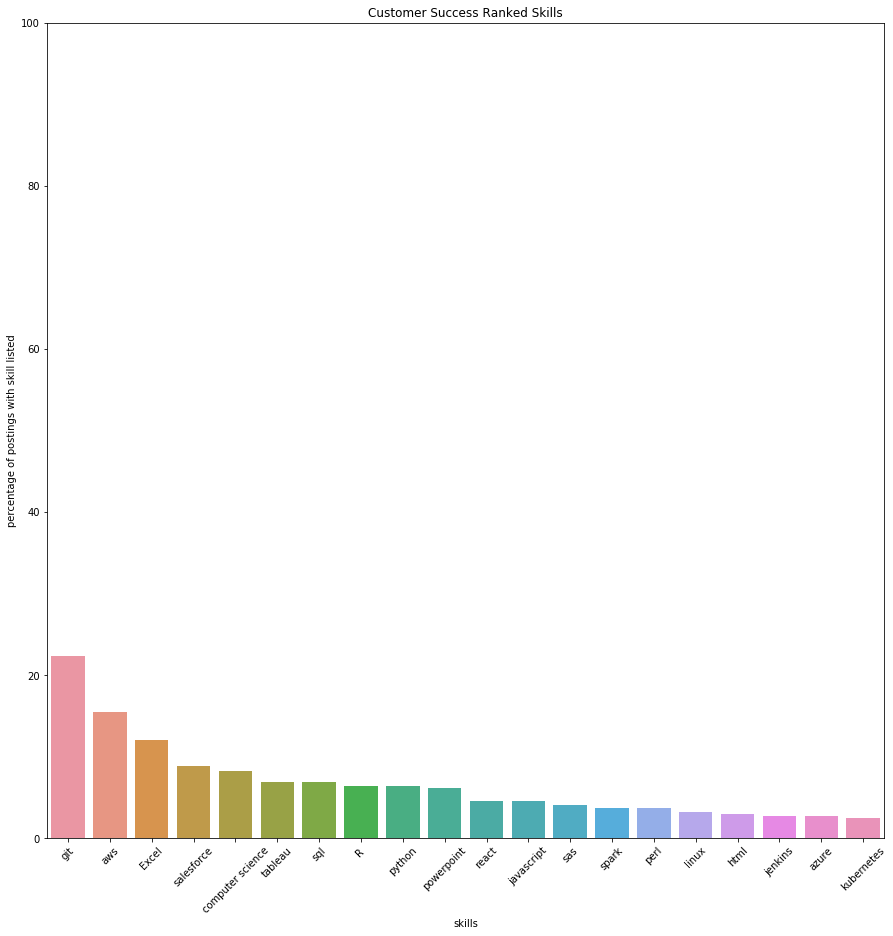

In [222]:
df_cs = df_perc.loc['customer_success'].sort_values(ascending=False).head(20)
df_cs = df_cs.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='customer_success', ax=ax, data=df_cs)
plt.xticks(rotation=45);
plt.title('Customer Success Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

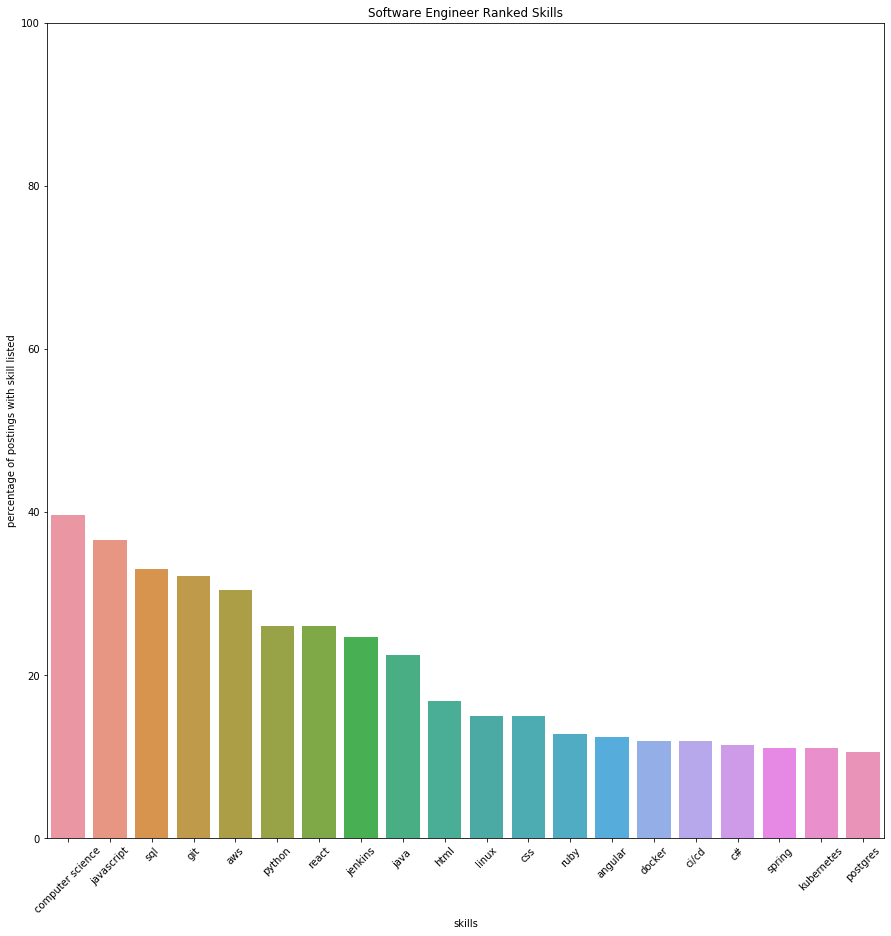

In [223]:
df_se = df_perc.loc['software_engineer'].sort_values(ascending=False).head(20)
df_se = df_se.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='software_engineer', ax=ax, data=df_se)
plt.xticks(rotation=45);
plt.title('Software Engineer Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

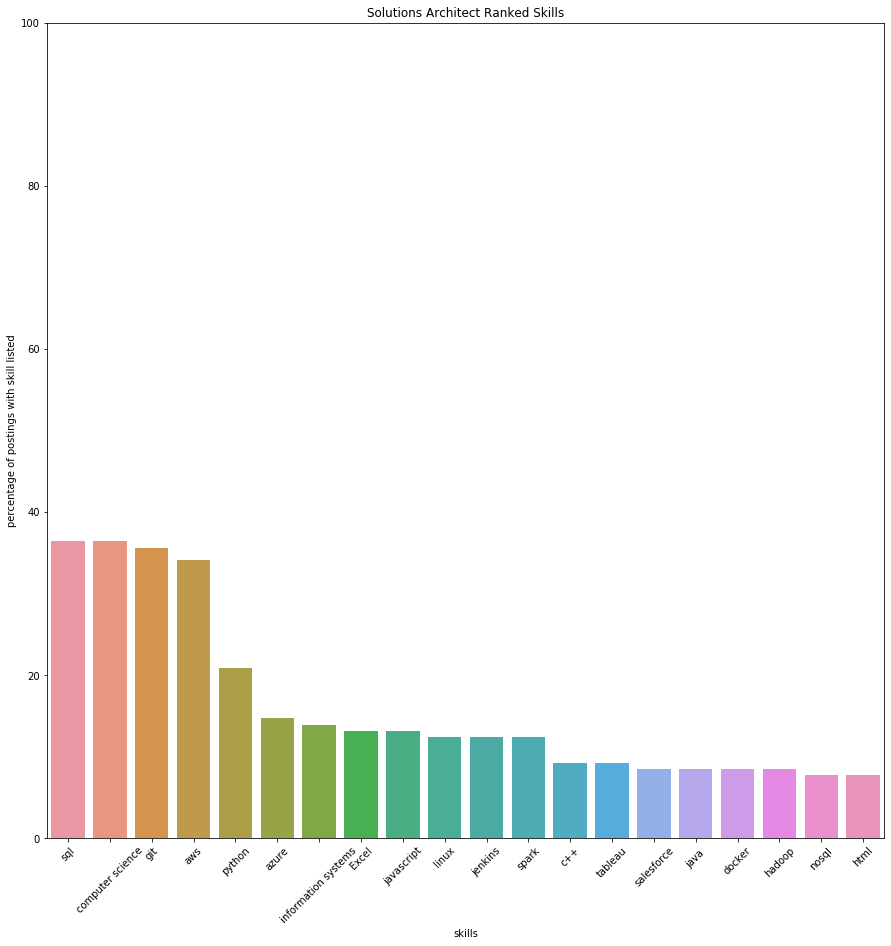

In [224]:

df_sa = df_perc.loc['solutions_architect'].sort_values(ascending=False).head(20)
df_sa = df_sa.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='solutions_architect', ax=ax, data=df_sa)
plt.xticks(rotation=45);
plt.title('Solutions Architect Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

               index  developer
0   computer science  39.215686
1         javascript  37.254902
2                git  34.313725
3                sql  33.823529
4                aws  31.372549
5             python  29.411765
6              react  27.941176
7            jenkins  26.470588
8              java   23.529412
9               html  17.647059
10               css  17.156863
11               php  15.686275
12           angular  14.215686
13             linux  13.725490
14            docker  12.254902
15               c++  12.254902
16              node  11.764706
17             ci/cd  11.764706
18            spring  11.764706
19          postgres  11.274510


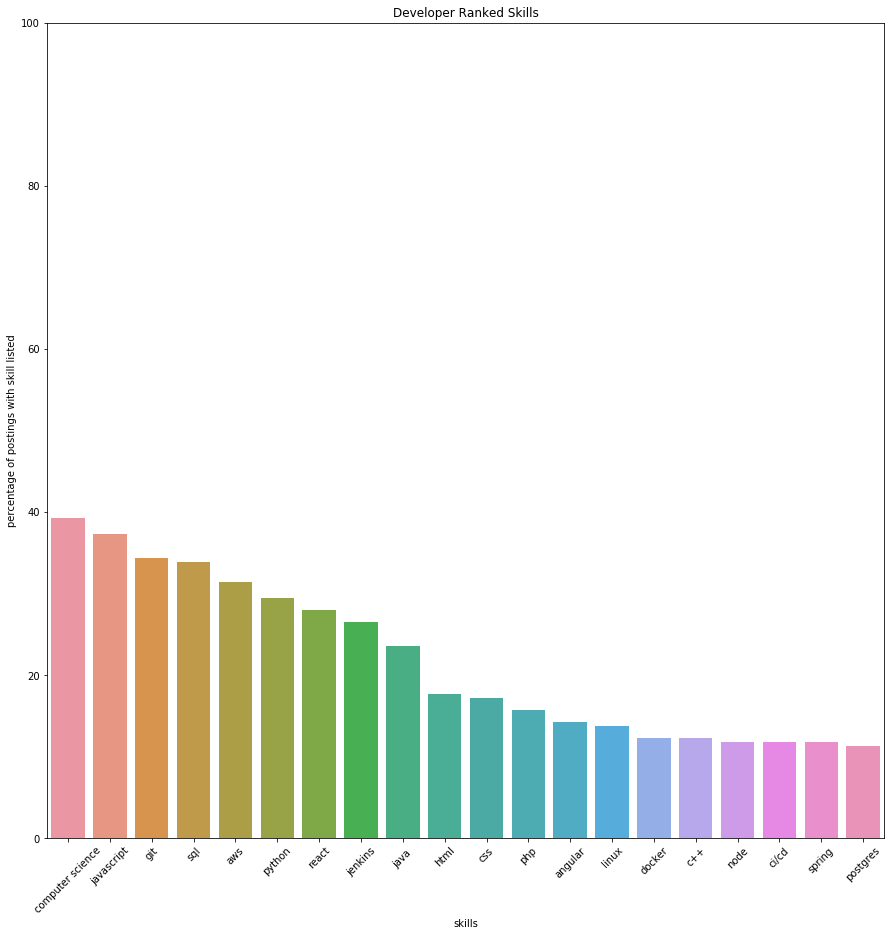

In [225]:
df_dev = df_perc.loc['developer'].sort_values(ascending=False).head(20)
df_dev = df_dev.reset_index()

print(df_dev)
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='developer', ax=ax, data=df_dev)
plt.xticks(rotation=45);
plt.title('Developer Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

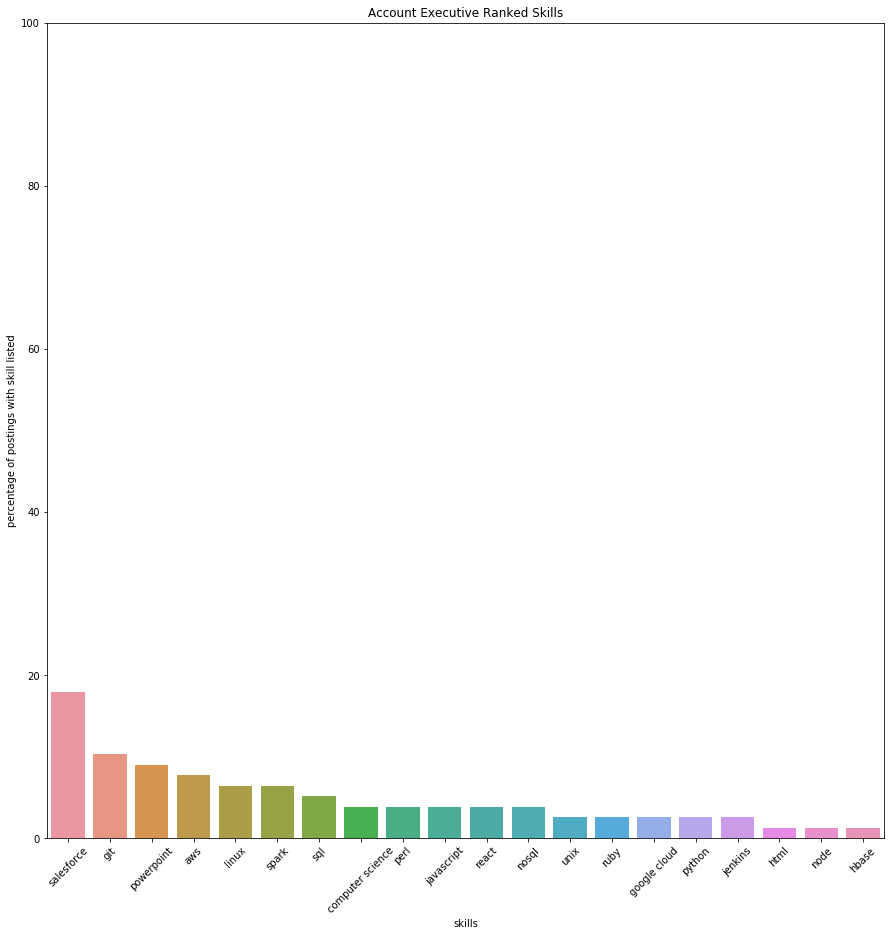

In [226]:
df_ae = df_perc.loc['account_executive'].sort_values(ascending=False).head(20)
df_ae = df_ae.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='account_executive', ax=ax, data=df_ae)
plt.xticks(rotation=45);
plt.title('Account Executive Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

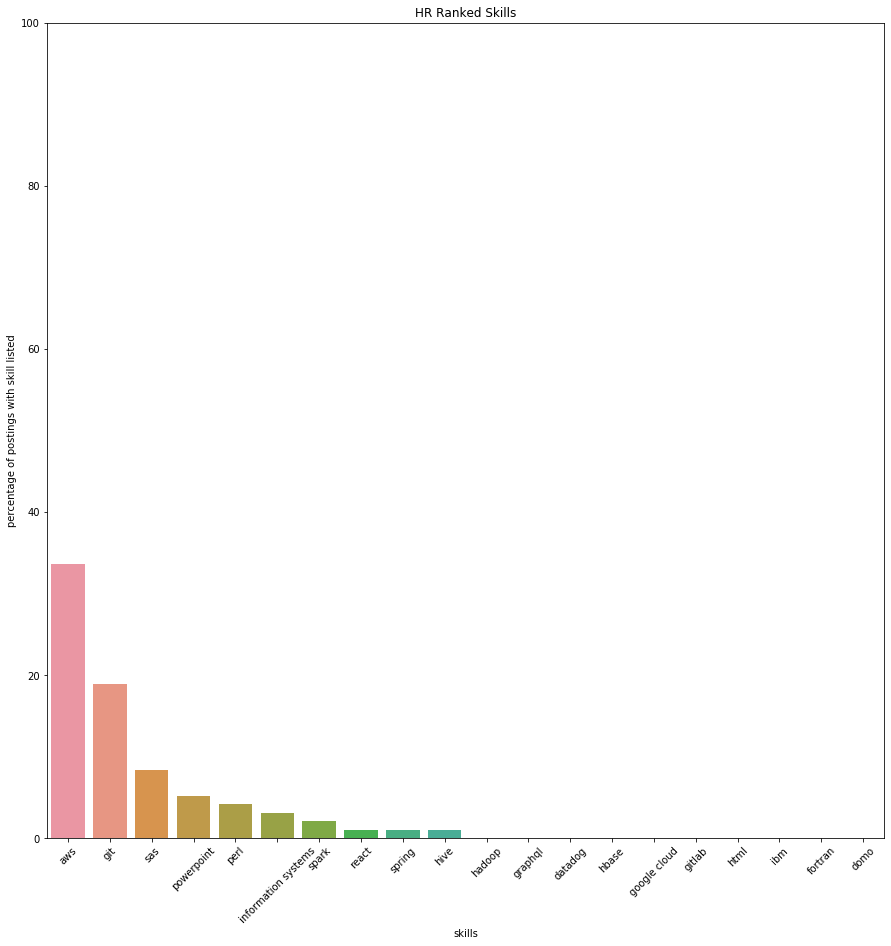

In [227]:
df_hr = df_perc.loc['human_resources'].sort_values(ascending=False).head(20)
df_hr = df_hr.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='human_resources', ax=ax, data=df_hr)
plt.xticks(rotation=45);
plt.title('HR Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

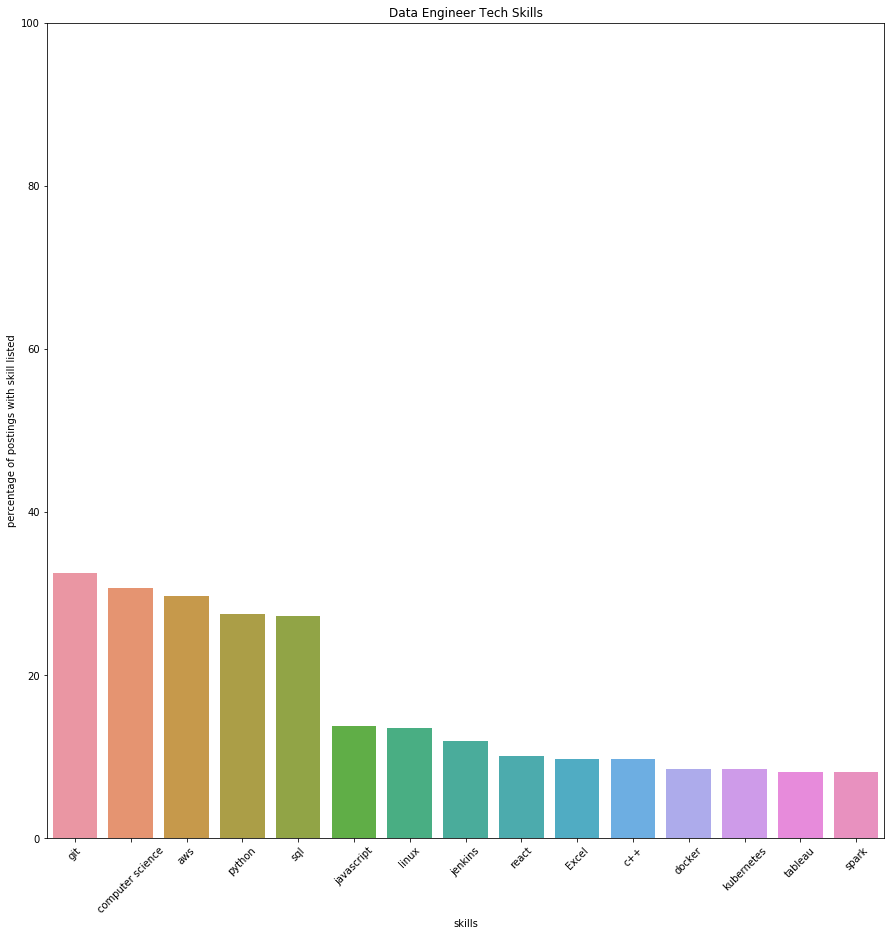

In [228]:
df_de = df_perc.loc['data_engineer'].sort_values(ascending=False).head(15)
df_de = df_de.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='data_engineer', ax=ax, data=df_de)
plt.xticks(rotation=45);
plt.title('Data Engineer Tech Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));